In [18]:
import jsonlines
import pandas as pd

In [16]:
with open('results/prompt-1-ppl-toxicity-experiment.txt') as f:
    story = list(jsonlines.Reader(f))

In [20]:
results_df = pd.DataFrame(story)

In [27]:
expanded_results_df = (
    results_df
     .set_index(['cfg', 'dataset'])['all_ppls']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .rename(columns={0:'ppl'})
     .drop('level_2', axis=1)
)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
import numpy as np

In [49]:
expanded_results_df.assign(ppl=lambda df: df['ppl'].pipe(lambda s: np.exp(-np.log(-s))))

,cfg,dataset,ppl
0,1.0,toxic,5.044266e+01
1,1.0,toxic,4.481009e+01
2,1.0,toxic,3.628376e+01
3,1.0,toxic,7.331855e+01
4,1.0,toxic,1.087793e+01
...,...,...,...
12241,7.0,non-toxic,5.708040e-09
12242,7.0,non-toxic,3.748839e-01
12243,7.0,non-toxic,1.358550e+00
12244,7.0,non-toxic,6.385157e+00


<AxesSubplot:xlabel='cfg', ylabel='ppl'>

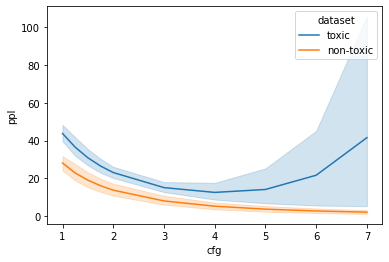

In [51]:
sns.lineplot(
    data=(
        expanded_results_df
        .assign(ppl=lambda df: df['ppl'].pipe(lambda s: np.exp(-np.log(-s))))
        # .loc[lambda df: df['cfg'] < 3]
    ),
    hue='dataset',
    y='ppl',
    x='cfg'
)